In [1]:
from __future__ import division
import numpy as np
from PIL import Image
import openslide as opsl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import progressbar
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from sklearn import neighbors
import time
import cv2
import gc
import os,sys
import random
sys.path.append('/cptjack/totem/StainTools/')
from utils import visual_utils as vu
from utils import misc_utils as mu
from normalization.vahadane import VahadaneNormalizer

In [2]:
def img_color_hist(folder_zero,bin_count):
    dir_img = os.listdir(folder_zero+'/')
#    file_num = sum([len(files) for root, dirs, files in os.walk(folder_zero)])
    data = np.zeros((len(dir_img),bin_count,1))
    p = progressbar.ProgressBar()
    for i in p(range(len(dir_img))):
        Img = cv2.imread(folder_zero+'/'+dir_img[i])
        Img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)
        data[i,:,:] = cv2.calcHist([Img],[0],None,[bin_count],[0,256])
    data = data.reshape(len(dir_img),bin_count)
    return data

In [3]:
def img_predict(folder_zero,bin_count,kmean_model,save_dir):
    dir_img = dir_img = os.listdir(folder_zero+'/')
    p = progressbar.ProgressBar()
    for i in p(range(len(dir_img))):
        data_test = np.zeros((1,bin_count,1,3))
        Img_test = cv2.imread(folder_zero+'/'+dir_img[i])
        for j in range(3):
            data_test[0,:,:,j] = cv2.calcHist([Img_test],[j],None,[bin_count],[0,256])
        data_test = data_test.reshape(1,bin_count*3)
        label = kmean_model.predict(data_test)
        if label==0:
            sub_dir='0'
        else:
            sub_dir='1'
        cv2.imwrite(save_dir+'/'+sub_dir+'/'+dir_img[i],Img_test)

In [4]:
if __name__ == '__main__':    
    dir_zero = '/cptjack/totem/18738_in'
 #   data = img_color_hist(dir_zero,128)
    

In [4]:
    data.shape

(4708, 192)

In [13]:
    if os.path.exists('/cptjack/totem/Colon Pathology/kmeans_model_gray_128.m'):
        k = joblib.load('/cptjack/totem/Colon Pathology/kmeans_model_gray_128.m')
    else:
        k = KMeans(n_clusters=2,random_state=0,max_iter=4000,tol=0.00001,algorithm='full').fit(data)
        joblib.dump(k,'/cptjack/totem/Colon Pathology/kmeans_model_gray_128.m')    

In [25]:
    save_result_dir = '/cptjack/totem/18738_k_meas_test_128'
    if not os.path.exists(save_result_dir):os.makedirs(save_result_dir)  
    img_predict(dir_zero,128,k,save_result_dir)

100% (4708 of 4708) |####################| Elapsed Time: 0:00:16 Time:  0:00:16


In [11]:
    dir_img = dir_img = os.listdir(dir_zero+'/')
    data_test = np.zeros((1,64,1,3))
    print(dir_img[1])
    Img_test = cv2.imread(dir_zero+'/'+dir_img[1])
    for j in range(3):
        data_test[0,:,:,j] = cv2.calcHist([Img_test],[j],None,[64],[0,256])
    data_test = data_test.reshape(1,64*3)
    label = k.predict(data_test)
    print(label)

18738__y11295_x17851_p1.png
[0]


N/A% (0 of 4708) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

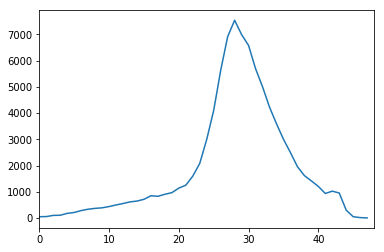

  0% (1 of 4708) |                       | Elapsed Time: 0:00:00 ETA:   0:21:22

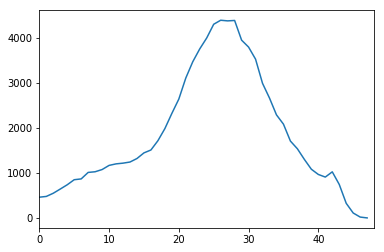

  0% (2 of 4708) |                       | Elapsed Time: 0:00:00 ETA:   0:21:29

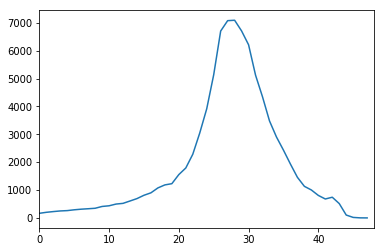

  0% (3 of 4708) |                       | Elapsed Time: 0:00:00 ETA:   0:21:39

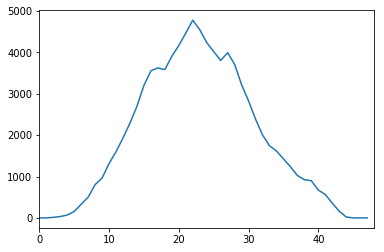

  0% (4 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:21:13

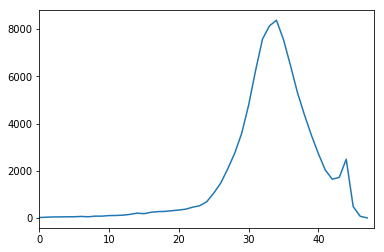

  0% (5 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:21:09

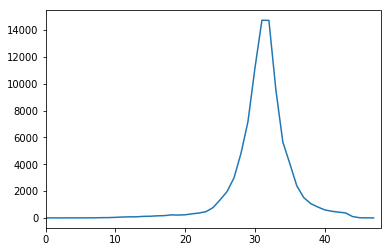

  0% (6 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:22:03

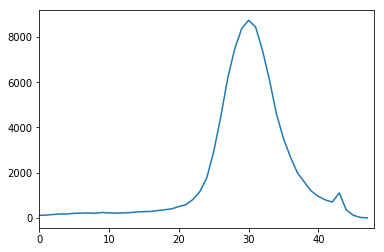

  0% (7 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:21:51

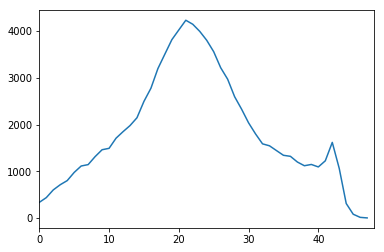

  0% (8 of 4708) |                       | Elapsed Time: 0:00:02 ETA:   0:21:44

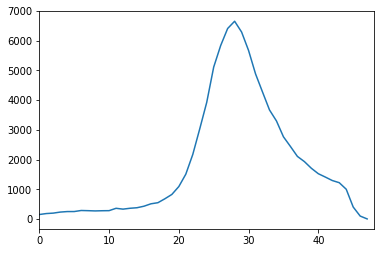

  0% (9 of 4708) |                       | Elapsed Time: 0:00:02 ETA:   0:21:46

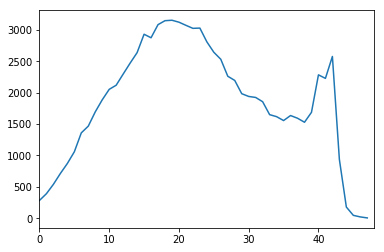

  0% (10 of 4708) |                      | Elapsed Time: 0:00:02 ETA:   0:21:47

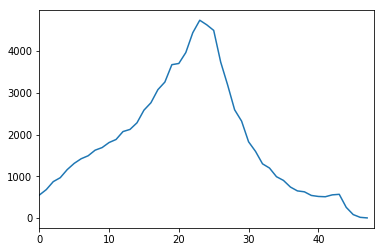

  0% (11 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:21:40

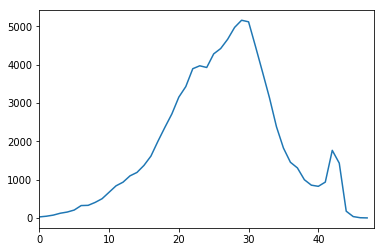

  0% (12 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:21:54

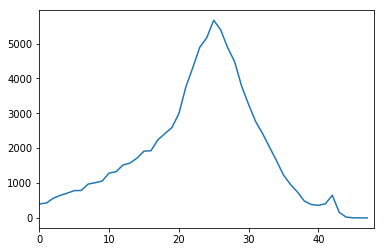

  0% (13 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:22:01

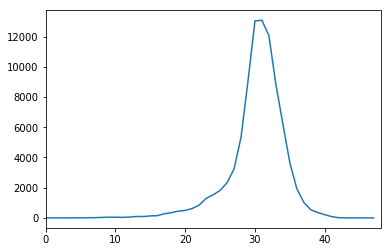

  0% (14 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:21:25

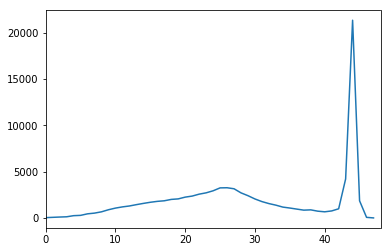

  0% (15 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:21:30

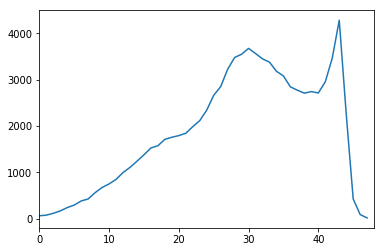

  0% (16 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:21:33

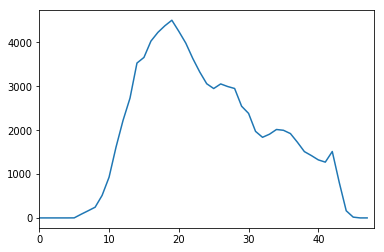

  0% (17 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:21:31

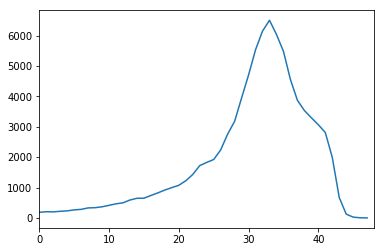

  0% (18 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:21:33

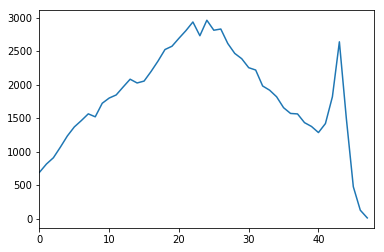

  0% (19 of 4708) |                      | Elapsed Time: 0:00:05 ETA:   0:22:07

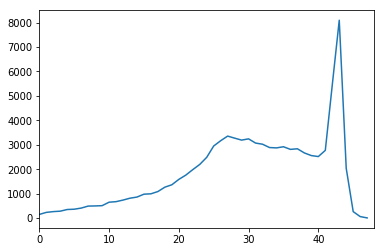

  0% (20 of 4708) |                      | Elapsed Time: 0:00:05 ETA:   0:22:12

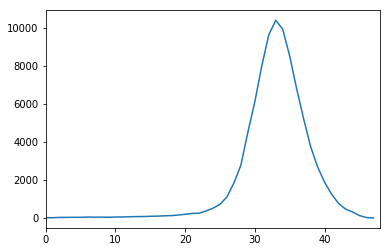

  0% (21 of 4708) |                      | Elapsed Time: 0:00:05 ETA:   0:22:11

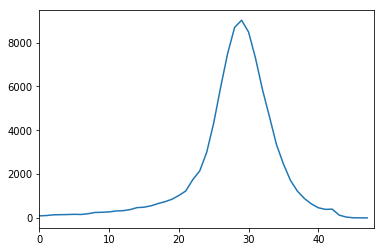

  0% (22 of 4708) |                      | Elapsed Time: 0:00:06 ETA:   0:22:06

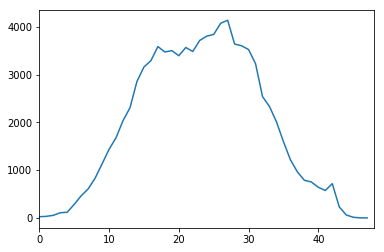

  0% (23 of 4708) |                      | Elapsed Time: 0:00:06 ETA:   0:22:06

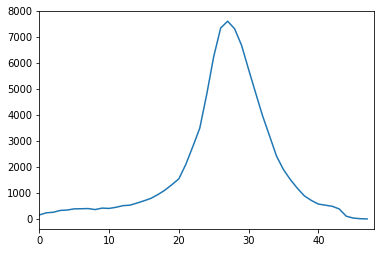

KeyboardInterrupt: 

In [12]:
    dir_img = dir_img = os.listdir(dir_zero+'/')
    #color = ('b','g','r')
    px = progressbar.ProgressBar()
    plt.ion()
    plt.show()
    for i in px(range(len(dir_img))):
        #print(dir_img[i])
        Img_test = cv2.imread(dir_zero+'/'+dir_img[i])
        Img_test = cv2.cvtColor(Img_test,cv2.COLOR_BGR2GRAY)
        plt.cla()
        hist = cv2.calcHist([Img_test],[0],None,[48],[64,256])
        plt.plot(hist)
        plt.xlim([0,48])
        plt.pause(0.1)
    plt.ioff()
    #plt.show()

N/A% (0 of 4708) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

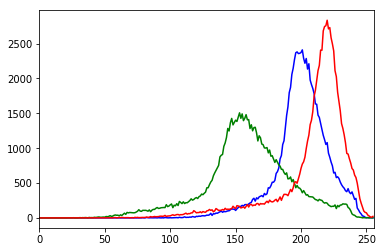

  0% (1 of 4708) |                       | Elapsed Time: 0:00:00 ETA:   0:23:00

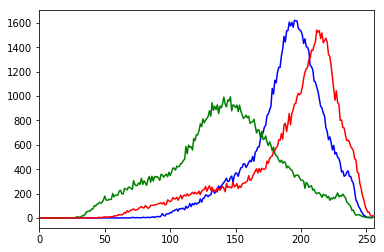

  0% (2 of 4708) |                       | Elapsed Time: 0:00:00 ETA:   0:25:35

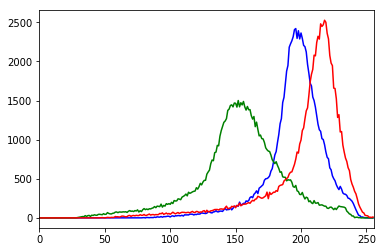

  0% (3 of 4708) |                       | Elapsed Time: 0:00:00 ETA:   0:24:25

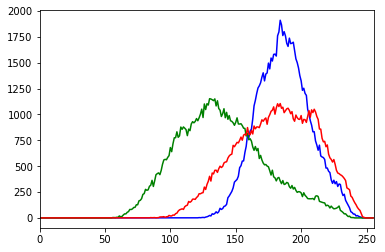

  0% (4 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:23:55

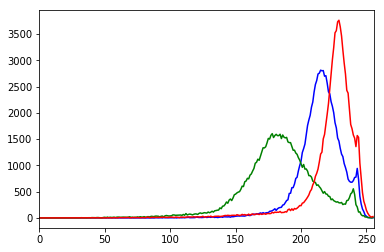

  0% (5 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:23:31

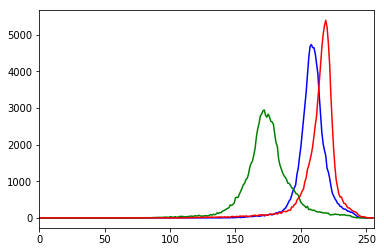

  0% (6 of 4708) |                       | Elapsed Time: 0:00:01 ETA:   0:23:08

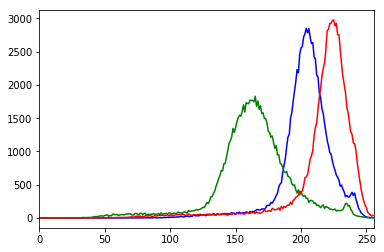

  0% (7 of 4708) |                       | Elapsed Time: 0:00:02 ETA:   0:22:56

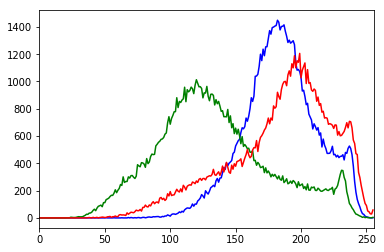

  0% (8 of 4708) |                       | Elapsed Time: 0:00:02 ETA:   0:22:49

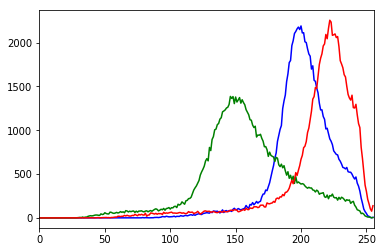

  0% (9 of 4708) |                       | Elapsed Time: 0:00:02 ETA:   0:22:34

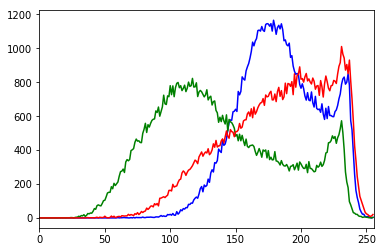

  0% (10 of 4708) |                      | Elapsed Time: 0:00:02 ETA:   0:21:41

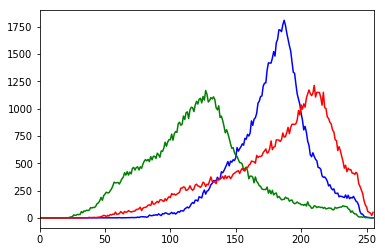

  0% (11 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:21:41

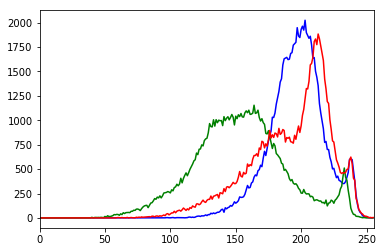

  0% (12 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:21:40

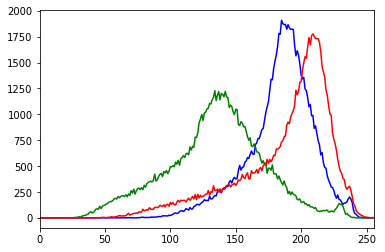

  0% (13 of 4708) |                      | Elapsed Time: 0:00:03 ETA:   0:22:34

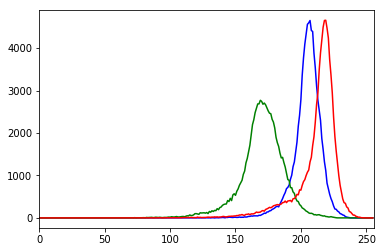

  0% (14 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:22:27

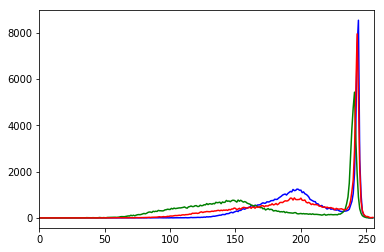

  0% (15 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:22:15

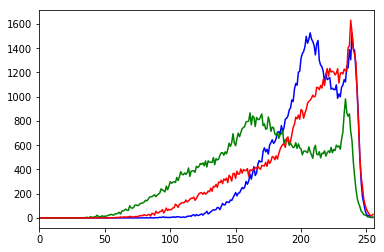

  0% (16 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:22:28

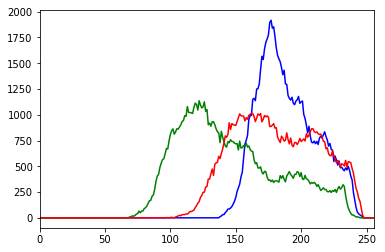

  0% (17 of 4708) |                      | Elapsed Time: 0:00:04 ETA:   0:22:38

KeyboardInterrupt: 

In [50]:
    dir_img = dir_img = os.listdir(dir_zero+'/')
    color = ('b','g','r')
    px = progressbar.ProgressBar()
    plt.ion()
    plt.show()
    for i in px(range(len(dir_img))):
        #print(dir_img[i])
        Img_test = cv2.imread(dir_zero+'/'+dir_img[i])
        plt.close()
        for j,col in enumerate(color):
            hist = cv2.calcHist([Img_test],[j],None,[256],[0,256])
            plt.plot(hist,color = col)
            plt.xlim([0,256])
        plt.pause(0.1)
    plt.ioff()
    plt.show()
    

In [14]:
    if label==0:
        print('done!')

done!
